In [98]:
#importacao de pacotes
import numpy as np
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

In [99]:
#funcao degau bipolar
def bipolar(u):
    return np.where(u >= 0, 1, -1)

#funcao que classifica a amostra com base na rede ja treinada
def previsao(w,x):
  u=np.dot(w.T,x)
  return bipolar(u)

In [100]:
#PASSO 1: OBTER O CONJUNTO DE AMOSTRAS DE TREINAMENTO X
#carregar tabela de dados
dados = pd.read_csv("tabela_treino.csv", sep=";")
nump=5
#analise exploratoria de dados
#walker=pyg.walk(dados)

In [101]:
#quantidade de elementos na amostra
n_amostras=dados.shape[0]
print(n_amostras)

#quantidade variaveis de entrada(subrair a coluna de tipo)
n_variaveis=dados.shape[1]-1
print(n_variaveis)

#separando os dados contendo apenas as variaveis de entrada
x=dados.iloc[:,0:n_variaveis].values
print(x)

30
4
[[ 1.00000e+00 -6.50800e-01  1.09700e-01  4.00090e+00]
 [ 2.00000e+00 -1.44920e+00  8.89600e-01  4.40050e+00]
 [ 3.00000e+00  2.08500e+00  6.87600e-01  7.98450e+00]
 [ 4.00000e+00  2.62600e-01  1.14760e+00  1.20710e+01]
 [ 5.00000e+00  6.41800e-01  1.02340e+00  7.79850e+00]
 [ 6.00000e+00  2.56900e-01  6.73000e-01  8.32650e+00]
 [ 7.00000e+00  1.11550e+00  6.04300e-01  7.44460e+00]
 [ 8.00000e+00  9.14000e-02  3.39900e-01  7.06770e+00]
 [ 9.00000e+00  1.21000e-02  5.25600e-01  4.63160e+00]
 [ 1.00000e+01 -4.29000e-02  4.66000e-01  5.43230e+00]
 [ 1.10000e+01  4.34000e-01  6.87000e-01  8.22870e+00]
 [ 1.20000e+01  2.73500e-01  1.02870e+00  7.19340e+00]
 [ 1.30000e+01  4.83900e-01  4.85100e-01  7.48500e+00]
 [ 1.40000e+01  4.08900e-01 -1.26700e-01  5.50190e+00]
 [ 1.50000e+01  1.43910e+00  1.61400e-01  8.58430e+00]
 [ 1.60000e+01 -9.11500e-01 -1.97300e-01  2.19620e+00]
 [ 1.70000e+01  3.65400e-01  1.04750e+00  7.48580e+00]
 [ 1.80000e+01  2.14400e-01  7.51500e-01  7.16990e+00]
 [ 1.

In [102]:
#inserindo o bias
bias=np.ones((n_amostras,1))*-1
x=np.hstack((x,bias))
print(x)

[[ 1.00000e+00 -6.50800e-01  1.09700e-01  4.00090e+00 -1.00000e+00]
 [ 2.00000e+00 -1.44920e+00  8.89600e-01  4.40050e+00 -1.00000e+00]
 [ 3.00000e+00  2.08500e+00  6.87600e-01  7.98450e+00 -1.00000e+00]
 [ 4.00000e+00  2.62600e-01  1.14760e+00  1.20710e+01 -1.00000e+00]
 [ 5.00000e+00  6.41800e-01  1.02340e+00  7.79850e+00 -1.00000e+00]
 [ 6.00000e+00  2.56900e-01  6.73000e-01  8.32650e+00 -1.00000e+00]
 [ 7.00000e+00  1.11550e+00  6.04300e-01  7.44460e+00 -1.00000e+00]
 [ 8.00000e+00  9.14000e-02  3.39900e-01  7.06770e+00 -1.00000e+00]
 [ 9.00000e+00  1.21000e-02  5.25600e-01  4.63160e+00 -1.00000e+00]
 [ 1.00000e+01 -4.29000e-02  4.66000e-01  5.43230e+00 -1.00000e+00]
 [ 1.10000e+01  4.34000e-01  6.87000e-01  8.22870e+00 -1.00000e+00]
 [ 1.20000e+01  2.73500e-01  1.02870e+00  7.19340e+00 -1.00000e+00]
 [ 1.30000e+01  4.83900e-01  4.85100e-01  7.48500e+00 -1.00000e+00]
 [ 1.40000e+01  4.08900e-01 -1.26700e-01  5.50190e+00 -1.00000e+00]
 [ 1.50000e+01  1.43910e+00  1.61400e-01  8.5843

In [103]:
#PASSO 2: DO VETOR DE SAIDAS Y, ASSOCIAR A SAIDA ESPERADA Y PARA CADA X
y=dados.iloc[:,n_variaveis].values
print(y)

#contar quantas amostras de cada classe existem no dataset
print(f"-1: {(y==-1).sum()}")
print(f"1: {(y==1).sum()}")

[-1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 16
1: 14


In [104]:
#PASSO 3: INICIALIZAR OS VETORES DE PESOS W COM VALORES ALEATORIOS
pesos = [np.random.rand(n_variaveis + 1) for i in range(nump)]
pesos_iniciais=[w.copy() for w in pesos]
for i in range(nump):
    print(f"w{i+1}: {pesos[i]}")

w1: [0.99567954 0.10645826 0.18028143 0.79451899 0.9046993 ]
w2: [0.28445484 0.2203729  0.23666448 0.59508277 0.15938257]
w3: [0.21002526 0.95688151 0.49608239 0.20544408 0.56063809]
w4: [0.72940711 0.25517836 0.23808136 0.60941939 0.37345262]
w5: [0.29114902 0.67351672 0.01323898 0.81132439 0.40028735]


In [ ]:
#PASSO 4: DEFINIR A TAXA DE APRENDIZAGEM COM VALOR ENTRE 0 E 1
#taxa de aprendizagem eta
eta=0.000001

#PASSO 5: CALCULAR O NUMERO DE AMOSTRAS EM X
#ja foi feito e esta em n_amostras

#PASSO 6: DEFINIR A TOLERANCIA AO ERRO
tolerancia=0.02

#PASSO 7: SETAR O ERRO INICIAL MAIOR QUE A TOLERANCIA
erro_medio=[tolerancia+1]*nump

#PASSO 8: CRIAR O VETOR QUE IRA ARMAZENAR O ERRO DE TODAS AS EPOCAS, EPOCA A EPOCA
erro_epocas = [[] for i in range(nump)]

#PASSO 9: INICIALIZA O CONTADOR DE EPOCAS
epocas = [0] * nump

#PASSO 10: DEFINE O MAXIMO DE EPOCAS
max_epocas=1200000

In [106]:
pesos = [np.random.rand(n_variaveis + 1) for _ in range(nump)]
epocas = [0] * nump
erro_epocas = [[] for _ in range(nump)]

for idx in range(nump):
    erro_medio = tolerancia + 1
    epoca = 0
    w = pesos[idx]

    while erro_medio >= tolerancia and epoca < max_epocas:
        epoca += 1
        erro_atual = 0
        indices = np.random.permutation(n_amostras)

        for i in indices:
            xi = x[i, :]
            u = np.dot(w.T, xi)
            yhat = bipolar(u)
            e = y[i] - yhat
            w += eta * e * xi
            erro_atual += np.abs(e)

        erro_medio = erro_atual / n_amostras
        erro_epocas[idx].append(erro_medio)

    pesos[idx] = w
    epocas[idx] = epoca

Conjunto ideal de pesos w1
[-2.47925832e-05  1.54274098e-03  8.36770831e-03 -1.20625922e-03
 -1.73269669e-04]
Épocas para convergir: 1000000


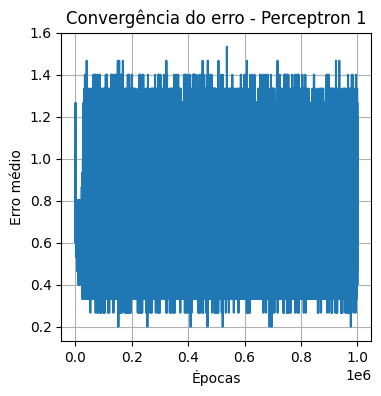

Conjunto ideal de pesos w2
[ 5.46058704e-04  1.33205537e-03  8.19817448e-03 -1.15994864e-03
 -6.98091573e-05]
Épocas para convergir: 1000000


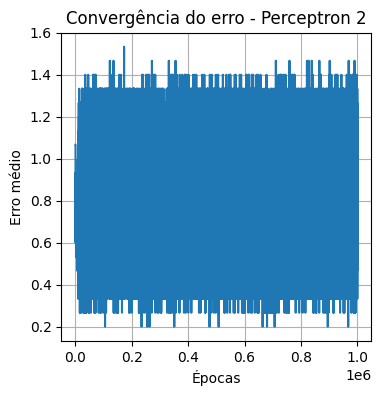

Conjunto ideal de pesos w3
[ 0.00028547  0.00114761  0.00829478 -0.00135335 -0.00014562]
Épocas para convergir: 1000000


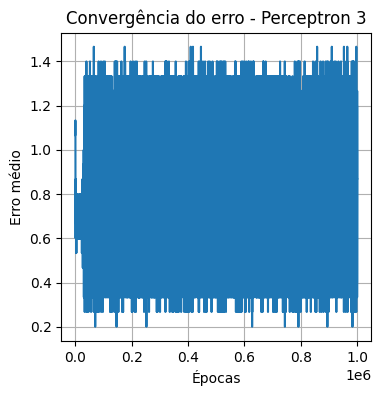

Conjunto ideal de pesos w4
[ 0.00033417  0.00150417  0.00847924 -0.00117179 -0.00032335]
Épocas para convergir: 1000000


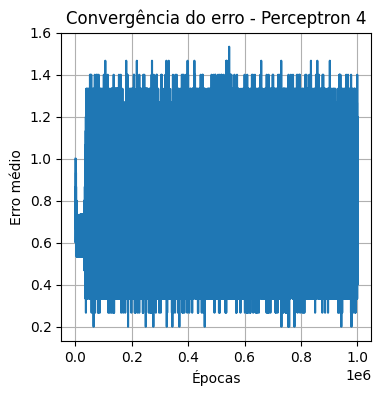

Conjunto ideal de pesos w5
[ 0.00027475  0.00124177  0.00841235 -0.00104674 -0.00028847]
Épocas para convergir: 1000000


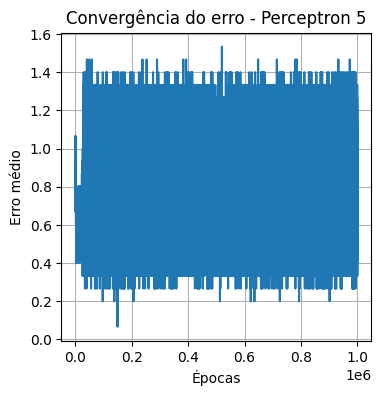

In [107]:
for idx in range(nump):
    print(f'Conjunto ideal de pesos w{idx+1}\n{pesos[idx]}\nÉpocas para convergir: {epocas[idx]}')
    
    plt.figure(figsize=(4,4))
    plt.plot(erro_epocas[idx])
    plt.title(f'Convergência do erro - Perceptron {idx+1}')
    plt.xlabel('Épocas')
    plt.ylabel('Erro médio')
    plt.grid(True)
    plt.show()

In [108]:
yhat = [np.zeros(n_amostras) for _ in range(nump)]

for idx in range(nump):
    for i in range(n_amostras):
        yhat[idx][i] = previsao(pesos[idx], x[i,:])


for idx in range(nump):
    acuracia = (np.sum(yhat[idx] == y) / n_amostras) * 100
    print(f"Acurácia Perceptron {idx+1}: {acuracia:.2f}%")

num_pesos = n_variaveis + 1
cabecalho = "Treino".ljust(8)
for i in range(num_pesos):
    cabecalho += f"w{i}_ini".rjust(10)
for i in range(num_pesos):
    cabecalho += f"w{i}_fim".rjust(10)
print(cabecalho)
for idx in range(nump):
    linha = f"{'Treino '+str(idx+1)}".ljust(8)
    # pesos iniciais
    for w in pesos_iniciais[idx]:
        linha += f"{w:10.4f}"
    # pesos finais
    for w in pesos[idx]:
        linha += f"{w:10.4f}"
    print(linha)

Acurácia Perceptron 1: 66.67%
Acurácia Perceptron 2: 46.67%
Acurácia Perceptron 3: 70.00%
Acurácia Perceptron 4: 53.33%
Acurácia Perceptron 5: 56.67%
Treino      w0_ini    w1_ini    w2_ini    w3_ini    w4_ini    w0_fim    w1_fim    w2_fim    w3_fim    w4_fim
Treino 1    0.9957    0.1065    0.1803    0.7945    0.9047   -0.0000    0.0015    0.0084   -0.0012   -0.0002
Treino 2    0.2845    0.2204    0.2367    0.5951    0.1594    0.0005    0.0013    0.0082   -0.0012   -0.0001
Treino 3    0.2100    0.9569    0.4961    0.2054    0.5606    0.0003    0.0011    0.0083   -0.0014   -0.0001
Treino 4    0.7294    0.2552    0.2381    0.6094    0.3735    0.0003    0.0015    0.0085   -0.0012   -0.0003
Treino 5    0.2911    0.6735    0.0132    0.8113    0.4003    0.0003    0.0012    0.0084   -0.0010   -0.0003
